# Patient Treatment Outcome Analysis & Cost Optimization

In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("healthcare_dataset.csv")

In [6]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [11]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

# kya kya krna hai
1. Track patient treatment life cycle from admission to discharge. 
2. Analyze treatment cost breakdown across departments and procedures. 
3. Identify high-risk patients with a likelihood of readmission. 
4. Detect inefficiencies in bed occupancy and discharge delays. 
5. Visualize outcomes per treatment plan and department. 
6. Recommend steps for reducing costs and improving care quality. 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
df.duplicated().sum()

534

In [12]:
df=df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


# data cleaning and strusted for EDA

In [14]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [20]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days


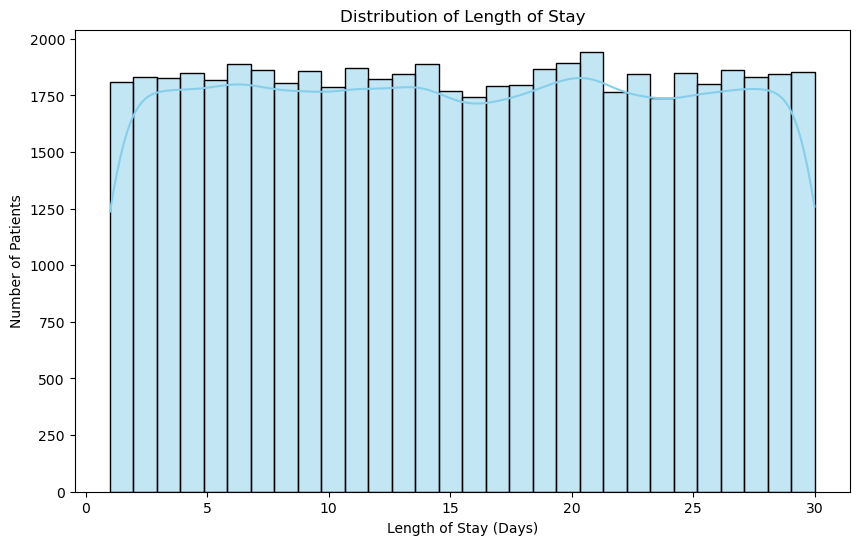

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Length of Stay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Number of Patients')
plt.show()


In [19]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [33]:
cost_by_hosp = df.groupby(['Hospital'],as_index=False)['Billing Amount'].sum().sort_values(by="Billing Amount",ascending=False).head(10)
cost_by_hosp.columns = ["hospitals","cost"]


In [34]:
cost_by_hosp

,hospitals,cost
14869,Johnson PLC,1.081477e+06
16879,LLC Smith,1.030190e+06
28908,Smith PLC,1.029424e+06
18590,Ltd Smith,1.003366e+06
28888,Smith Ltd,9.700359e+05
14833,Johnson Inc,9.343107e+05
10883,Group Smith,9.029758e+05
13753,Inc Brown,8.779613e+05
16662,LLC Johnson,8.164384e+05
28850,Smith Group,8.066313e+05


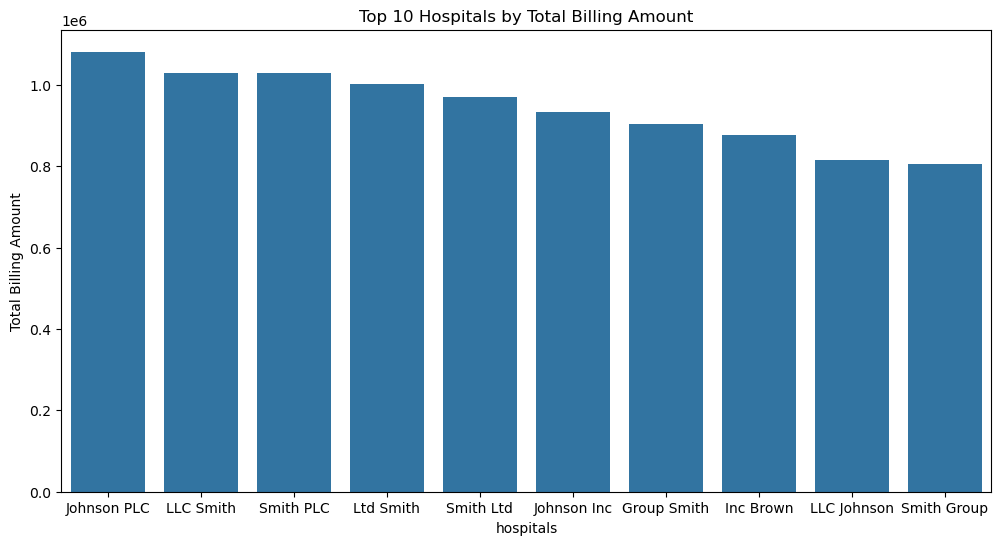

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x="hospitals",y="cost",data=cost_by_hosp)
plt.title('Top 10 Hospitals by Total Billing Amount')
plt.ylabel('Total Billing Amount')
plt.show()


In [60]:
readd= df["Name"].value_counts().reset_index()
readd.columns=["name","visit"]
high_risk = readd[readd["visit"]>1].sort_values(by="visit", ascending=False).head(15)
#top 15
high_risk

,name,visit
0,DAvId muNoZ,3
3313,sHANNON fleTCHeR,2
3320,ChrIstoPher BakeR,2
3319,BRiAN cAmeron,2
3318,mAtthEw HARdin,2
3317,marcUs CoOke,2
3316,mARCus JoneS,2
3315,KaREn LOwery,2
3314,BRENDA sTrICkLaND,2
3312,emILy mItChELL,2


<Axes: xlabel='visit', ylabel='Count'>

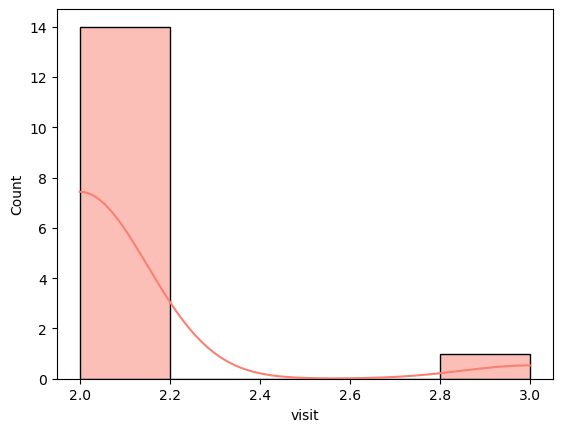

In [62]:
sns.histplot(high_risk['visit'], kde=True, color='salmon')

<Axes: xlabel='name', ylabel='visit'>

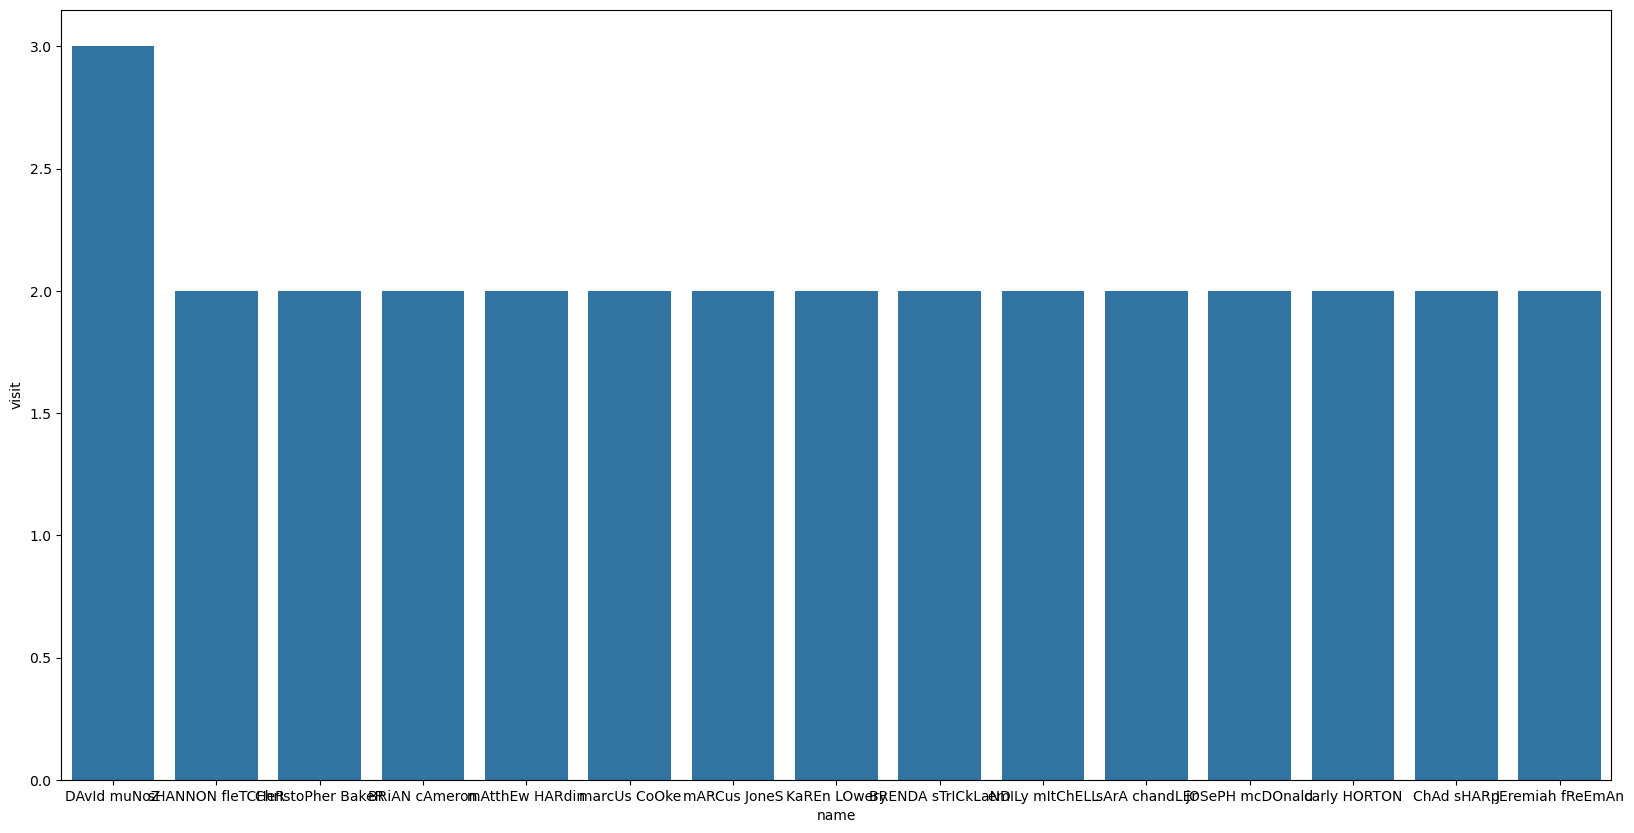

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x="name",y="visit",data =high_risk)

In [67]:
delay_data = df[df['Length of Stay'] > df['Length of Stay'].mean()]
delayed_discharges = delay_data[['Name', 'Room Number', "Admission Type",'Hospital', 'Length of Stay']].sort_values(by='Length of Stay', ascending=False).head(10)
delayed_discharges

,Name,Room Number,Admission Type,Hospital,Length of Stay
3,andrEw waTtS,450,Elective,"Hernandez Rogers and Vang,",30
40875,sTeveN MARtInEz,414,Elective,Williams-Nichols,30
23031,dAniELLE JOHnsOn,461,Elective,"Nicholson and Hendricks, Miles",30
23042,JoSEPh WalkeR,486,Emergency,Stein-Anderson,30
40898,anthonY LEWis,137,Urgent,"and Kramer Ward, White",30
40892,rANDall rODrigueZ,185,Emergency,Williams-Haynes,30
23050,dAnIEl Ho,440,Urgent,"Nelson Foley, Smith and",30
23096,TERrI escoBar,475,Emergency,Bailey-Miller,30
23116,carOL CUNniNghAm,365,Urgent,"Benitez Carroll, and Hutchinson",30
40783,jaMEs siMPSon,335,Emergency,"Johns Barton Cabrera, and",30


<Axes: xlabel='Admission Type', ylabel='Length of Stay'>

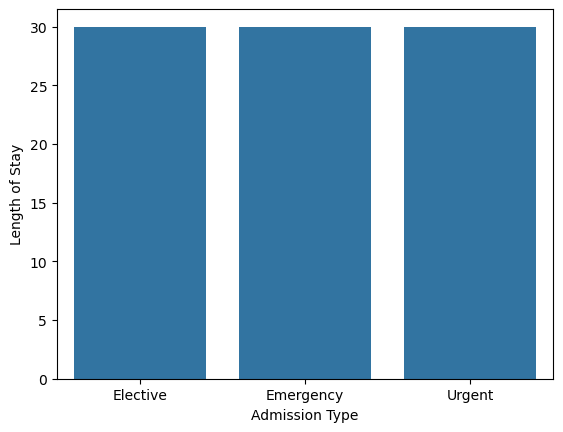

In [71]:
sns.barplot(x="Admission Type",y="Length of Stay",data=delayed_discharges)

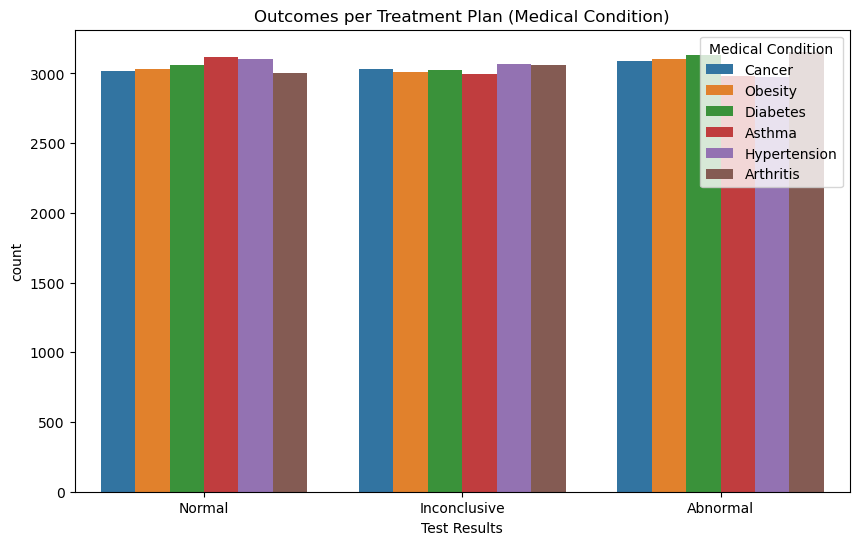

In [74]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Test Results', hue='Medical Condition')
plt.title('Outcomes per Treatment Plan (Medical Condition)')
plt.show()
